# Check Space-time Segment Conflict

In [1]:
import sys
sys.path.append('../')

import numpy as np
from matplotlib import pyplot as plt

import shapely
from shapely.plotting import plot_polygon, plot_line

from panav.util import unique_tx, interpolate_positions,unit_cube
from panav.PBS.conflict import seg_conflict

%load_ext autoreload
%autoreload 2

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/geometry/point.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  coords = np.asarray(coords).squeeze()


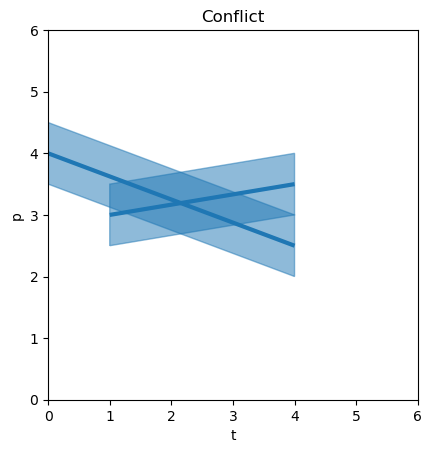

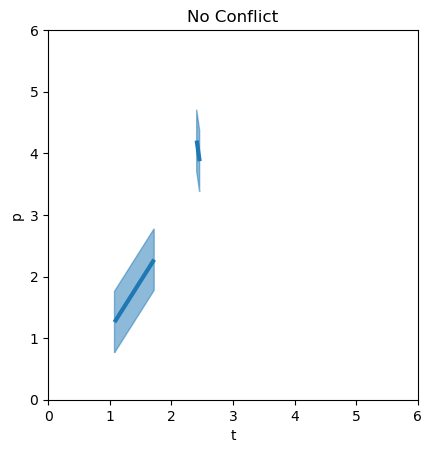

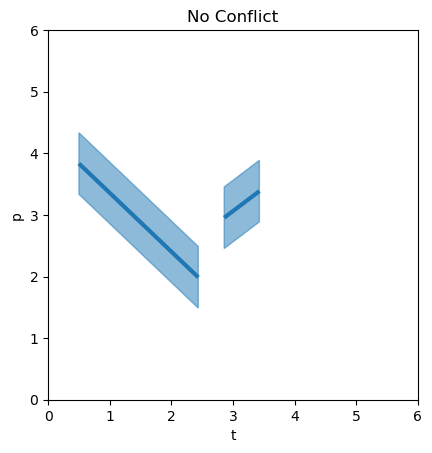

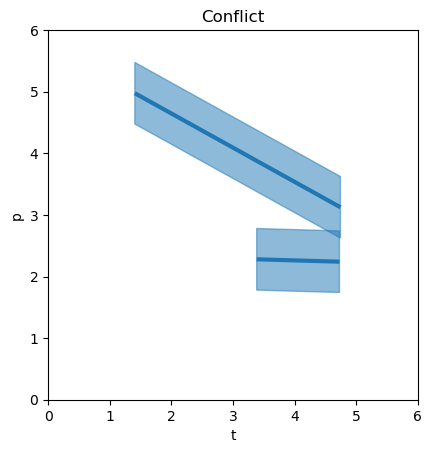

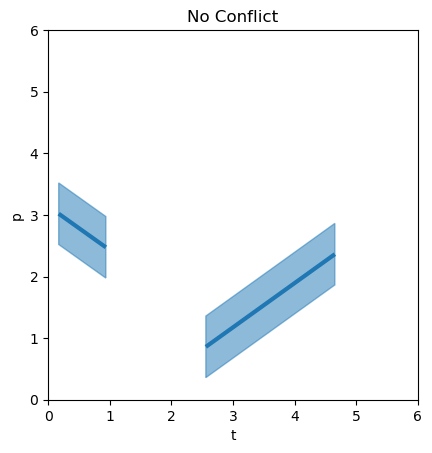

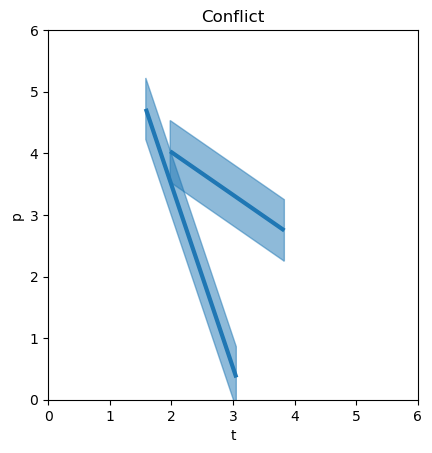

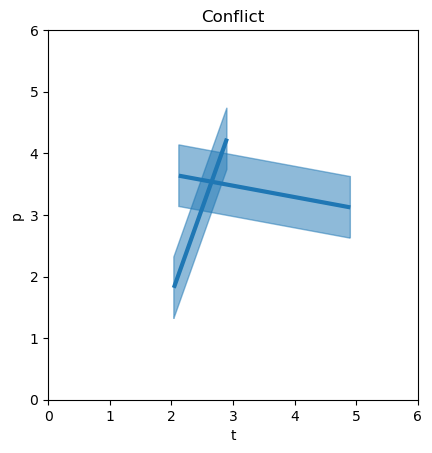

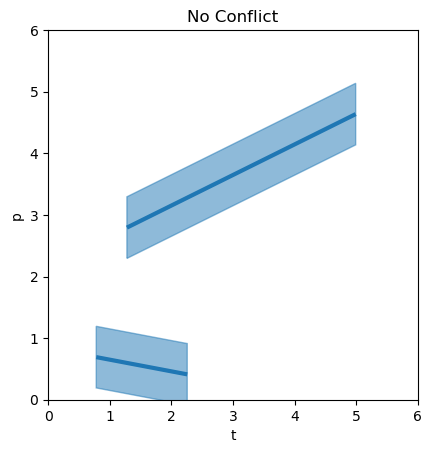

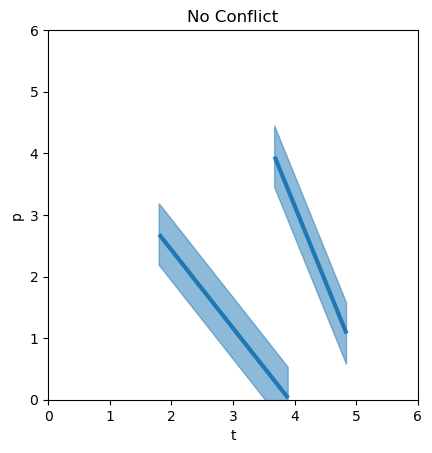

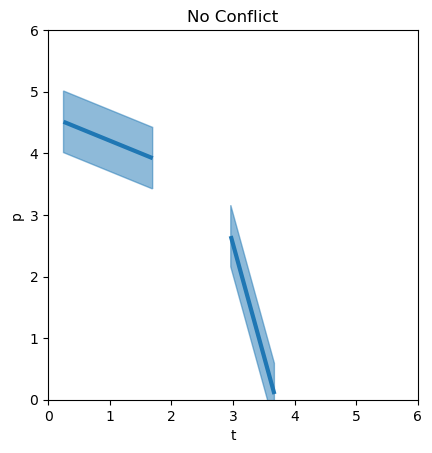

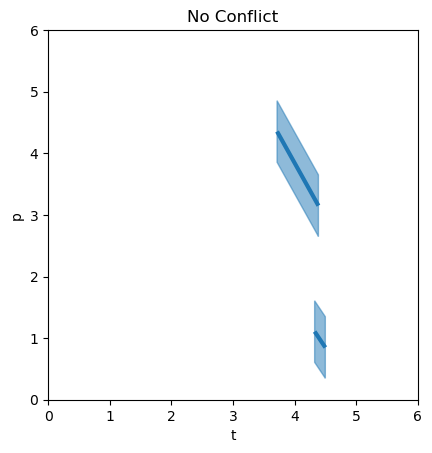

In [2]:
N = 10
tas  = [np.array([1,4])]\
        +[np.sort(np.random.uniform(0,5,2)) for _  in range(N)]

pas = [np.array([[3,3.5]])]\
        +[np.random.uniform(0,5,(1,2)) for _ in range(N)]

tbs = [np.array([0,4])]\
        +[np.sort(np.random.uniform(0,5,2)) for _  in range(N)]
pbs = [np.array([[4,2.5]])]\
        +[np.random.uniform(0,5,(1,2)) for _ in range(N)]

d = 1
bloating_r = 0.5

xlim = (0,6)
ylim = (0,6)

for ta,tb,pa,pb in zip(tas,tbs,pas,pbs):
    
    ax = plt.gca()

    segments = [np.vstack([ta,pa]),
                np.vstack([tb,pb])]

    for seg in segments:
        line = shapely.geometry.LineString(seg.T)
        t = seg[0,:]
        p = seg[1:,:]

        tube_vertices = [(t[i],p[:,i]+bloating_r*unit_vec) 
                         for i in range(len(t))
                          for unit_vec in unit_cube(d)]


        plot_line(line, ax=ax, add_points=False, linewidth=3)
        plot_polygon(shapely.convex_hull(shapely.MultiPoint(tube_vertices)), ax=ax, add_points=False, alpha=0.5)

    conflict = seg_conflict(ta,pa,tb,pb,bloating_r,bloating_r)

    title = 'Conflict' if conflict else 'No Conflict'

    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel('t')
    ax.set_ylabel('p')
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()